In [2]:
import numpy as np
from pylab import plot, show
%load_ext autoreload
%autoreload 2
import dice_battle as dice
import print_dice 

In [175]:
print_dice.print_dice_rolls([1,2,3,4,5,6])

+-----+  +-----+  +-----+  +-----+  +-----+  +-----+  
|     |  | o   |  | o   |  | o o |  | o o |  | o o |  
|  o  |  |     |  |  o  |  |     |  |  o  |  | o o |  
|     |  |   o |  |   o |  | o o |  | o o |  | o o |  
+-----+  +-----+  +-----+  +-----+  +-----+  +-----+  


In [173]:
P = dice.probabilities(5)
P

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.30555556, 0.        , 0.        , 0.13888889, 0.13888889,
        0.13888889, 0.13888889, 0.13888889, 0.13888889, 0.13888889,
        0.13888889, 0.13888889, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.4212963 , 0.        , 0.        , 0.        , 0.        ,
        0.02314815, 0.0462963 , 0.06944444, 0.09259259, 0.11574074,
        0.11574074, 0.11574074, 0.11574074, 0.

In [165]:
N, r = dice.expected_rewards(blind_strategy,random_strategy,1000,300)

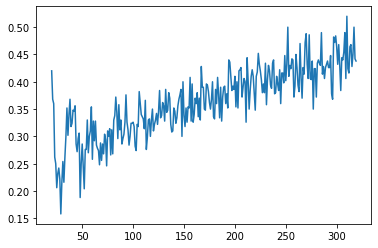

In [174]:
plot(N,r)

In [3]:
dice.probabilities(4)

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.30555556, 0.        , 0.        , 0.13888889, 0.13888889,
        0.13888889, 0.13888889, 0.13888889, 0.13888889, 0.13888889,
        0.13888889, 0.13888889, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.4212963 , 0.        , 0.        , 0.        , 0.        ,
        0.02314815, 0.0462963 , 0.06944444, 0.09259259, 0.11574074,
        0.11574074, 0.11574074, 0.11574074, 0.11574074, 0.09259259,
        0.06944444, 0.0462963 , 0.02314815, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.517

In [12]:
def EG(d1,d2,P):
    s = 0
    for k in range(1,6*d1+1):
        for l in range(1,6*d2+1):
            if k > l : 
                s += P[d1-1][k-1] * P[d2-1][l-1]
            elif k < l : 
                s -= P[d1-1][k-1] * P[d2-1][l-1]
    return s
def matrice_gain(D):
    P = dice.probabilities(D)
    G = np.zeros([D,D])
    for d1 in range(1, D+1):
        for d2 in range(1, D+1):
            G[d1-1][d2-1] = EG(d1,d2,P)
    return G

In [13]:
matrice_gain(3)

array([[ 6.93889390e-18, -7.87037037e-01, -6.86728395e-01],
       [ 7.87037037e-01, -1.94289029e-16, -6.59722222e-01],
       [ 6.86728395e-01,  6.59722222e-01, -3.81639165e-17]])

In [3]:
np.inf

inf

In [17]:
def EG1(i,j,d,memo,P,N):
    if(memo[i,j]!= np.inf):
        return memo[i,j]
    memo[i,j]=-P[d,1]*EG1(j,i+1,optimal_strategy(j,i+1,len(P),P,N),np.ones([(N-1+6*d)+1,(N-1+6*d)+1])*np.inf,P)-np.sum([P[d,k]*EG1(j,i+k,optimal_strategy(j,i+k,len(P),P,N),np.ones([N-1+6*d,N-1+6*d])*np.inf,P)for k in range(2*d,6*d+1)])
    return memo[i,j]
    
    

In [19]:
##def optimal_strategy(i,j,D,P,N):
    ##return 1+np.argmax([EG1(i,j,d,np.ones([(N-1+6*d)+1,(N-1+6*d)+1])*np.inf,P,N)for d in range(1,D+1)])
        
        
    

In [20]:
optimal_strategy(0,0,3,dice.probabilities(3),50)

IndexError: index 56 is out of bounds for axis 1 with size 56

In [5]:
def optimal_strategy_iter(D,P,N):
    memo = np.ones([N-1+6*D,N-1+6*D])
    d = np.zeros([N-1,N-1])
    for i in range(1,N):
        for j in range(N,N+6*D-1):
                memo[i-1,j-1] = -1
    for i in range(N-2, -1, -1):
        for j in range(N-2, -1, -1):
            E = np.array([-P[d,1]*(memo[j,i+1]) \
                    - np.sum([P[d,r]*(memo[j,i+r]) for r in range(2*d,6*d+1)]) for d in range(D)])
            memo[i,j] = np.max(E)
            d[i,j] = 1 + np.argmax(E)
    return memo, d

In [7]:
"""import sys
sys.getrecursionlimit()"""
D = 10
N = 50
P = dice.probabilities(D)
optimal_strategy_iter(D,P,N)[1]

array([[ 8., 10.,  1., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       ...,
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.]])